# PFAS Toolbox

### Libraries Import

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


### Data Import

In [12]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [22]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/ConnieRdz/PFAS Database Sample.xlsx'
#Specify sheet name
sheet_name = 'All'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()


,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop,Sampling Location
0,INTL PAPER-4/6/2023 10:30 AM-10:2Fluorotelomer...,421895,INTL PAPER,Quarterly Monitoring - Q2-2023,2023-04-06 10:30:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<0.760,ppt_wt_v,...,Paper Products,NaN,Paper Products,NaN,NaN,NaN,NaN,NaN,NaN,Before outfall
1,INTL PAPER-4/6/2023 10:30 AM-11Cl-PF3OUdS (Rep...,421895,INTL PAPER,Quarterly Monitoring - Q2-2023,4/6/2023 10:30 AM,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<0.480,ppt_wt_v,...,Paper Products,NaN,Paper Products,NaN,NaN,NaN,NaN,NaN,NaN,Before outfall
2,INTL PAPER-4/6/2023 10:30 AM-4:2Fluorotelomers...,421895,INTL PAPER,Quarterly Monitoring - Q2-2023,4/6/2023 10:30 AM,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<0.480,ppt_wt_v,...,Paper Products,NaN,Paper Products,NaN,NaN,NaN,NaN,NaN,NaN,Before outfall
3,INTL PAPER-4/6/2023 10:30 AM-8:2Fluorotelomers...,421895,INTL PAPER,Quarterly Monitoring - Q2-2023,4/6/2023 10:30 AM,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<0.570,ppt_wt_v,...,Paper Products,NaN,Paper Products,NaN,NaN,NaN,NaN,NaN,NaN,Before outfall
4,INTL PAPER-4/6/2023 10:30 AM-9Cl-PF3ONS (Report),421895,INTL PAPER,Quarterly Monitoring - Q2-2023,4/6/2023 10:30 AM,PFAS-CL,9Cl-PF3ONS (Report),NaN,<0.480,ppt_wt_v,...,Paper Products,NaN,Paper Products,NaN,NaN,NaN,NaN,NaN,NaN,Before outfall


### Bar Chart - Compare PFAS Compound Concentrations

In [4]:
def create_grouped_bar_chart(data_df, category_column, value_column, sub_group_column=None,
                             title=None, ylabel=None, figsize=None, xlabel=None):
    """
    Create a grouped bar chart with customizable title, y-axis label, figure size, and horizontal lines using data from a DataFrame.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        category_column (str): The column to use as categories/groups on the x-axis.
        value_column (str): The column to use for values on the y-axis.
        sub_group_column (str, optional): The column to use for grouping the data into subcategories.
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        xlabel (str, optional): The label for the x-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.

    Returns:
        None: Displays the grouped bar chart.

        Note: The value will be returned as the average value for the given category (PFAS compound) and 
        subcategory (either a sampling location or before/after sampling). Eg. it will return the mean value
        for all samples in the category. 
    """
    try:
        # Check if the group_column exists in the DataFrame
        if sub_group_column in data_df.columns:
            # Group data by 'PFAS Compound' and 'Sampling Location', and calculate the sum of values for each group
            grouped_data = data_df.groupby([category_column, sub_group_column])[value_column].mean().unstack(fill_value=0)
            
            # Create a grouped bar chart with custom figure size
            fig, ax = plt.subplots(figsize=figsize or (12, 6))  # Use custom figsize if provided, otherwise use default size
            grouped_data.plot(kind='bar', rot=0, ax=ax)
            plt.xlabel(xlabel or category_column)
            plt.ylabel(ylabel or value_column)
            plt.title(title or f'Grouped Bar Chart of {value_column} by {category_column} and {group_column}')
            plt.legend(title=sub_group_column)
        else:
            # If no group_column is provided, use only category_column for grouping
            grouped_data = data_df.groupby(category_column)[value_column].mean()

            # Create a regular bar chart with custom figure size
            fig, ax = plt.subplots(figsize=figsize or (10, 6))  # Use custom figsize if provided, otherwise use default size
            grouped_data.plot(kind='bar', rot=45, ax=ax)
            plt.xlabel(xlabel or category_column)
            plt.ylabel(ylabel or value_column)
            plt.title(title or f'Bar Chart of {value_column} by {category_column}')

        ax.yaxis.grid(True, linestyle='--', alpha=0.7)  # Add horizontal gridlines
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


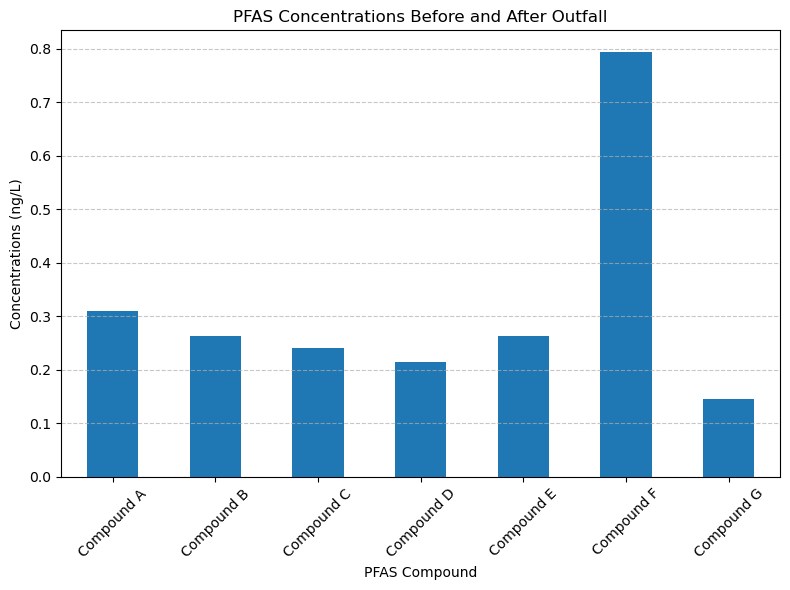

In [97]:
# Example Compare PFAS Compound Concentrations(No subcategories)

#Specify Category_column (str): The column to use as categories/groups on the x-axis.
#You may use the 'PFAS Compound'column; However, this will result in long labels for each category.
#It is recommended to create a new column with PFAS compound abbreviations to use as labels.
category_column = 'PFAS Compound (Abbrev.)'

#Specify value_column (str): The column to use for values on the y-axis.
#(Eg. 'Quant Only Incl Qual Flags', 'Quant Incl Estimates Incl Qual Flags','All (w BDL= MDL/2) Incl Qual Flags')
value_column='All (w BDL= MDL/2) Incl Qual Flags'

#Specify title (str, optional): The title for the chart. 
#By dafault the title will be 'Bar Chart of'+'value_column'+'by'+category_column
title='PFAS Concentrations Before and After Outfall'

#Specify ylabel (str, optional): The label for the y-axis. By default it will use the value_column name.
ylabel='Concentrations (ng/L)'

#Specify xlabel (str, optional): The label for the x-axis. By default it will use the category_column name.
xlabel='PFAS Compound'

#Specify figsize (tuple, optional): A tuple (width, height) specifying the figure size.
figsize=(8,6)

# Create a bar chart using the 'PFAS Compound' column as categories and 'All (w BDL= MDL/2) Incl Qual Flags' as values
create_grouped_bar_chart(data_df, category_column=category_column, value_column=value_column, title=title,
                        ylabel=ylabel, xlabel=xlabel,figsize=figsize)

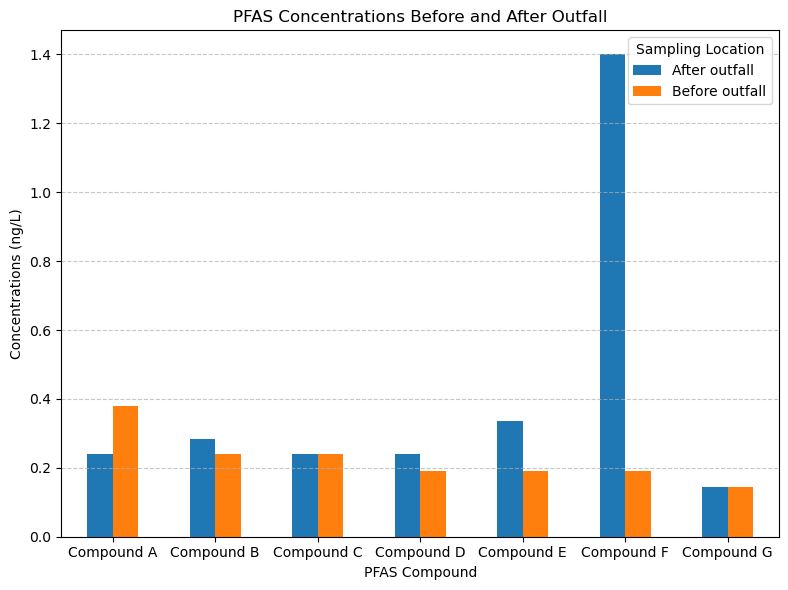

In [10]:
# Example Compare PFAS Compound Concentrations with subcategories (Different sampling locations)

#Specify Category_column (str): The column to use as categories/groups on the x-axis.
#You may use the 'PFAS Compound'column; However, this will result in long labels for each category.
#It is recommended to create a new column with PFAS compound abbreviations to use as labels.
category_column = 'PFAS Compound (Abbrev.)'

#Specify value_column (str): The column to use for values on the y-axis.
#(Eg. 'Quant Only Incl Qual Flags', 'Quant Incl Estimates Incl Qual Flags','All (w BDL= MDL/2) Incl Qual Flags')
value_column='All (w BDL= MDL/2) Incl Qual Flags'

#Specify sub_group_column (str, optional): The column to use for grouping the data into subcategories.
#This column may represent different sampling locations or sampling on different dates (before/after).
sub_group_column='Sampling Location'

#Specify title (str, optional): The title for the chart. 
#By dafault the title will be 'Bar Chart of'+'value_column'+'by'+category_column
title='PFAS Concentrations Before and After Outfall'

#Specify ylabel (str, optional): The label for the y-axis. By default it will use the value_column name.
ylabel='Concentrations (ng/L)'

#Specify xlabel (str, optional): The label for the x-axis. By default it will use the category_column name.
xlabel='PFAS Compound'

#Specify figsize (tuple, optional): A tuple (width, height) specifying the figure size.
figsize=(8,6)

# Create a bar chart using 'PFAS Compound' as categories and 'All (w BDL= MDL/2) Incl Qual Flags' as values
create_grouped_bar_chart(data_df, category_column=category_column, value_column=value_column, 
                        sub_group_column=sub_group_column, title=title, ylabel=ylabel,
                        xlabel=xlabel, figsize=figsize)

### Number of Samples per Year

#### Create Pivot Table

In [37]:
def create_pivot_table(data_df, filter_pfas_compound=None):
    """
    Create a pivot table with customizable PFAS Compound filter using data from a DataFrame.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_pfas_compound (list of str, optional): List of PFAS Compound values to filter the data (default is None).

    Returns:
        pd.DataFrame: The pivot table.
    """
    try:
        # Filter the data based on the provided PFAS Compound values if filter_pfas_compound is not None
        if filter_pfas_compound:
            filtered_data = data_df[data_df['PFAS Compound'].isin(filter_pfas_compound)]
        else:
            filtered_data = data_df

        # Extract the year from 'Sampled Date' column and create a new 'Year' column
        filtered_data['Year'] = pd.to_datetime(filtered_data['Sampled Date']).dt.year

        # Create a pivot table with 'Year' as index, 'Type' as columns, and sum of values as values
        pivot_table = pd.pivot_table(filtered_data, values='All (w BDL= MDL/2) Incl Qual Flags', index='Year', columns='Type', aggfunc='count', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [45]:
# Example - How to create a pivot table for number of sampler each year
#Specify filter_pfas_compound (list of str, optional): List of PFAS Compound values to filter the data (default is None).
filter_pfas_compound = ['Perfluorohexadecanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid']

# Create a pivot table with or without the PFAS Compound filter
pivot_table = create_pivot_table(data_df, filter_pfas_compound)
pivot_table

C:\Users\rodriguezc\AppData\Local\Temp\ipykernel_34664\2633616885.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = pd.to_datetime(filtered_data['Sampled Date']).dt.year


Type,Influent,Manhole,Outfall of Industry
Year,,,
2019,2,0,0
2020,1,1,0
2023,0,0,2


#### Create Bar Chart for Number of Samples per Year

In [41]:
def create_stacked_bar_chart(pivot_table, title=None, ylabel=None):
    """
    Create a stacked bar chart using a pivot table with years as x-labels and counts for each Type as stacked bars.

    Args:
        pivot_table (pd.DataFrame): The pivot table containing counts for each year and Type.
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.

    Returns:
        None: Displays the stacked bar chart.
    """
    try:
        # Create a stacked bar chart
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        pivot_table.plot(kind='bar', stacked=True, rot=0)
        plt.xlabel('Year')
        plt.ylabel(ylabel or 'Sample Count')
        plt.title(title or 'Stacked Bar Chart of Sample Counts by Year and Type')
        plt.legend(title='Type')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

<Figure size 1000x600 with 0 Axes>

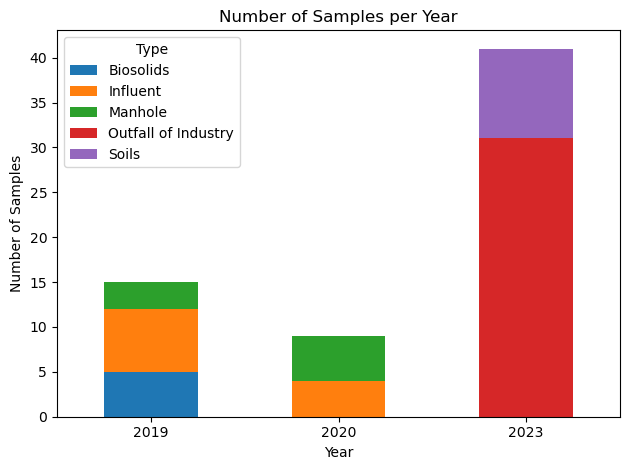

In [49]:
# Example usage: Create a stack bar shart for number of samples per year

# The function expect a pivot table. Please use the create_pivot_table function from 
# the previous example.
pivot_table = create_pivot_table(data_df, filter_pfas_compound=None)

#Specify a title (str, optional): The title for the chart.
title='Number of Samples per Year'
#Specify a ylabel (str, optional): The label for the y-axis.
ylabel='Number of Samples'

# Create a stacked bar chart with custom title and y-axis label
create_stacked_bar_chart(pivot_table, title=title, ylabel=ylabel)

### Compare PFAS Concentrations and Composition at Various Sites

#### Create Pivot Table for Average PFAS Compound Concentrations at Various Sites

In [56]:
def create_custom_pivot_table(data_df, filter_qual_summary=None, start_date=None, end_date=None):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)' and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='Sample Location', columns='PFAS Compound', aggfunc='mean', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [57]:
# Example usage with filters:
data = {'Qual Summary (Grade for filtering)': ['Grade A', 'Grade B', 'Grade A', 'Grade C', 'Grade B'],
        'Sample Date': ['2023-01-01', '2023-01-02', '2023-01-01', '2023-01-03', '2023-01-02'],
        'Sample Location': ['Location A', 'Location B', 'Location A', 'Location A', 'Location B'],
        'PFAS Compound': ['Compound A', 'Compound B', 'Compound A', 'Compound C', 'Compound B'],
        'Quant Incl Estimates Incl Qual Flags': [10.5, 12.3, 9.8, 8.7, 15.2]}

df = pd.DataFrame(data)

# Create a custom pivot table with date range filter
pivot_table = create_custom_pivot_table(df, start_date='2023-01-01', end_date='2023-01-02')
pivot_table

PFAS Compound,Compound A,Compound B
Sample Location,,
Location A,10.15,0.00
Location B,0.00,13.75


In [59]:
# Example usage with filters:

# Create a custom pivot table with filters
pivot_table = create_custom_pivot_table(data_df,start_date='2019-01-01', end_date='2023-12-30')
pivot_table

PFAS Compound,10:2Fluorotelomersulfonic acid,11Cl-PF3OUdS,4:2 Fluorotelomersulfonic acid,6:2 Fluorotelomersulfonic acid,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Perfluorononanoic acid,Perfluorooctadecanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid
Sample Location,,,,,,,,,,,,,,,,,,,,,
Durham Biosolids,0,0,0,0,0,0,0,0,0,0.0,...,0.00,0,0.00,0.0,7.3,0.00,0.00,0.91,0.65,3.5
Durham Influent,0,0,0,0,0,0,0,0,0,0.0,...,0.00,0,0.00,8.4,31.0,0.00,8.20,0.00,0.00,0.0
Forest Grove Influent,0,0,0,0,0,0,0,0,0,0.0,...,0.00,0,0.00,0.0,0.0,0.00,5.90,0.00,0.00,0.0
Hillsboro Influent,0,0,0,0,0,0,0,0,0,0.0,...,0.00,0,0.00,0.0,0.0,0.00,8.20,0.00,0.00,0.0
International Paper,0,0,0,0,0,0,0,0,0,0.0,...,0.93,0,0.59,48.0,17.0,0.62,0.00,0.00,0.00,0.0
MH#10840,0,0,0,0,0,0,0,0,0,0.0,...,0.00,0,0.00,10.0,24.0,0.00,6.25,0.00,0.00,0.0
MH#19992,0,0,0,0,0,0,0,0,0,0.0,...,0.00,0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0
MH#803895,0,0,0,0,0,0,0,0,0,0.0,...,0.00,0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0
Rock Creek Biosolids,0,0,0,0,0,0,0,0,0,4.8,...,0.00,0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0
